In [379]:
from multidict import MultiDict
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

In [382]:
df = pd.read_csv(r"https://raw.githubusercontent.com/meleshko-anastasiia/DZ/refs/heads/main/Computers.csv")
df

,rownames,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [383]:
df['multi'].value_counts()

multi
no     5386
yes     873
Name: count, dtype: int64

In [384]:
# 2. На основе проведенных наблюдений о взаимосвязи между переменными сформулируйте задачу классификациии или регрессии, 
# которая может иметь практическую ценность

In [385]:
#Классификация с помощью дерева решений

In [386]:
df.head()

,rownames,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [387]:
df.shape

(6259, 11)

In [391]:
df['trend'] = np.where(df['premium'] == 'yes' )

target_distr = df['trend'].value_counts().reset_index()
target_distr['trend'] = target_distr['trend'].astype(str)
plt.bar(data = target_distr, x = 'trend', height = 'count')
plt.show()

ValueError: Length of values (1) does not match length of index (6259)

In [368]:
iris = load_iris()
data = iris.data
target = iris.target

In [369]:
df = pd.DataFrame(data, columns = iris.feature_names)
df['target'] = target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [370]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [371]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [311]:
ram = df.ram
speed = df.speed

In [312]:
df['ram'].value_counts()

ram
8     2320
4     2236
16     996
2      394
24     297
32      16
Name: count, dtype: int64

In [313]:
df.shape

(6259, 11)

In [360]:
X = df.drop('ram', axis=1) 
y = df['ram'] 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=0.25, 
                                       random_state=2) 
X_train.shape, X_test.shape 

((4694, 10), (1565, 10))

In [361]:
X_train, X_test , y_train , y_test = train_test_split (x, y, test_size = 0.25, random_state = 42)

In [362]:
X_train.shape

(4694, 10)

In [363]:
X_test.shape

(1565, 10)

In [364]:
y_train.shape

(4694,)

In [365]:
y_test.shape

(1565,)

In [366]:
from sklearn.tree import DecisionTreeClassifier

In [367]:
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'yes'

In [331]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[16.  4.  8. ...  8.  8.  8.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [328]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [329]:
y_test

2304     25
3621    100
5821     66
2707     66
2596     33
       ... 
5770     66
1611     33
6004     66
952      33
3573    100
Name: speed, Length: 1252, dtype: int64

In [330]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (10,10))
plot_tree(clf, filled=True, feature_names = df.feature_names, class_names =  df.target_names)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'feature_names'

<Figure size 1000x1000 with 0 Axes>

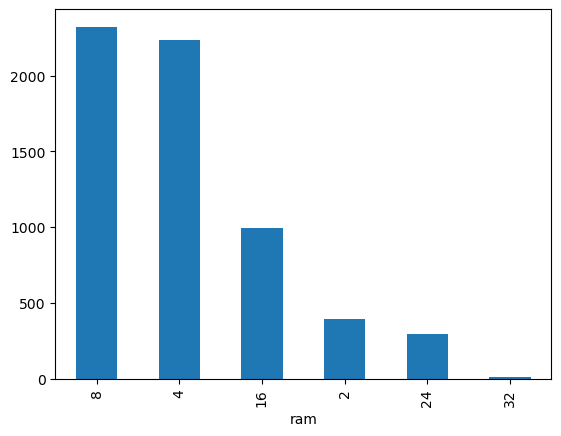

In [246]:
df['ram'].value_counts().plot(kind = 'bar')
plt.show()

In [247]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [1252, 30]

In [ ]:
# 3.Разделите датасет на обучающую (60%) и тестовую (40%) выборки. Далее тестовую выборку разделите пополам (20% и 20%):
# a)Первая половина будет использоваться для оценки качества модели. Предполагается, что здесь вы знаете наблюдаемые значения таргета и  можете сравнивать их с предсказаниями
# b)Вторая половина будет использоваться для построения прогнозов.
# Предполагается, что здесь значения таргета вам неизвестны – как в практической ситуациии использования моделей прогнозирования.

In [294]:
#Разделяем данные на две части: обучающая и тестовая
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [159]:
x = df.drop("ram", axis = 1) #Выборка обучающая
y = df["ram"] #Выборка ответеная

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [139]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [157]:
from xgboost import XGBClassifier, plot_importance, plot_tree
#Импортируем классификатор

In [156]:
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [134]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [ ]:
# 4.Обучите 3 различные модели, проведите оценку их качества на первой половине тестовой выборки

In [ ]:
# 5.Для повышения качества можете пользоваться следующими приемами:

In [ ]:
# a) Нормализация и стандартизация показателей

In [223]:
df['price'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min()) 

In [224]:
df['price'].describe()

count    6259.000000
mean        0.285523
std         0.130518
min         0.000000
25%         0.189888
50%         0.268539
75%         0.369888
max         1.000000
Name: price, dtype: float64

<Axes: >

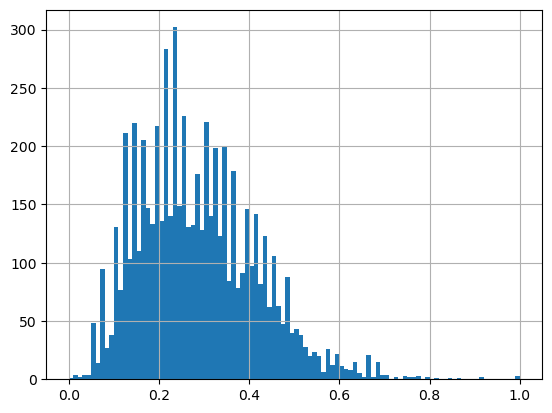

In [225]:
df['price'].hist(bins = 100)

In [ ]:
# b) Подбор гиперпараметров 

In [ ]:
# Подобрать значение гиперпараметра
for i in range(3, 13, 2):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    print('Neigbors:', i, 
          'Precision:', np.round(precision_score(y_test, y_pred),3), 
          'Recall', np.round(recall_score(y_test, y_pred),3)
         )

In [ ]:
df['ram'].value_counts()

In [227]:
X = df.drop("ram", axis=1) 
y = df['ram'] 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=0.25, 
                                       random_state=42) 
X_train.shape, X_test.shape 

((4694, 10), (1565, 10))

In [ ]:
# c) Включение / исключение дополнительных переменных

In [ ]:
# d) Трансформация переменных (квадраты, логарифмы итп.)

In [ ]:
# 6.Выберите ту модель и набор переменных, которые по вашему мнению дают наиболее удовлетворительное качество

In [ ]:
# 7.На основе второй половины тестовой выборки сделайте предсказание целевой переменной. 
# На основе предсказаний сделайте рекомендации для потенциальных пользователей вашего анализа